# Palmers Penguin
## EDA Project

## By: [Tahsin Jahin Khalid](https://tahsinjahinkhalid.github.io/)

Data has been obtained from the [Palmer Penguins](https://github.com/allisonhorst/palmerpenguins) R library by Allison Horst.

### Import Modules

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from icecream import ic
from scipy.stats import chi2_contingency

In [30]:
# adjust matplotlib params

plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (4.5, 3.5)

%matplotlib inline

### Load Data

In [31]:
data_dir= "data"
data_file = "penguins_cleaned.csv"
data_path = os.path.join(data_dir, data_file)

In [32]:
dataf = pd.read_csv(data_path, encoding="utf-8", 
                    header=0, index_col="Unnamed: 0")

dataf_c = dataf.copy()

In [33]:
dataf_c.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18.0,195,3250,female
5,Adelie,Torgersen,36.7,19.3,193,3450,female
6,Adelie,Torgersen,39.3,20.6,190,3650,male


### Univariate Analysis

#### Descriptive Statistics

In [34]:
dataf_c[["culmen_length_mm", "culmen_depth_mm", 
         "flipper_length_mm", "body_mass_g"]].describe().round(1)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.0,333.0,333.0,333.0
mean,44.0,17.2,201.0,4207.1
std,5.5,2.0,14.0,805.2
min,32.1,13.1,172.0,2700.0
25%,39.5,15.6,190.0,3550.0
50%,44.5,17.3,197.0,4050.0
75%,48.6,18.7,213.0,4775.0
max,59.6,21.5,231.0,6300.0


#### Frequency Table

In [35]:
dataf_c[["species", "island", "sex"]].value_counts().reset_index(name="count")

,species,island,sex,count
0,Gentoo,Biscoe,male,61
1,Gentoo,Biscoe,female,58
2,Chinstrap,Dream,female,34
3,Chinstrap,Dream,male,34
4,Adelie,Dream,male,28
5,Adelie,Dream,female,27
6,Adelie,Torgersen,female,24
7,Adelie,Torgersen,male,23
8,Adelie,Biscoe,female,22
9,Adelie,Biscoe,male,22


### Bivariate Analysis

#### Species-wise

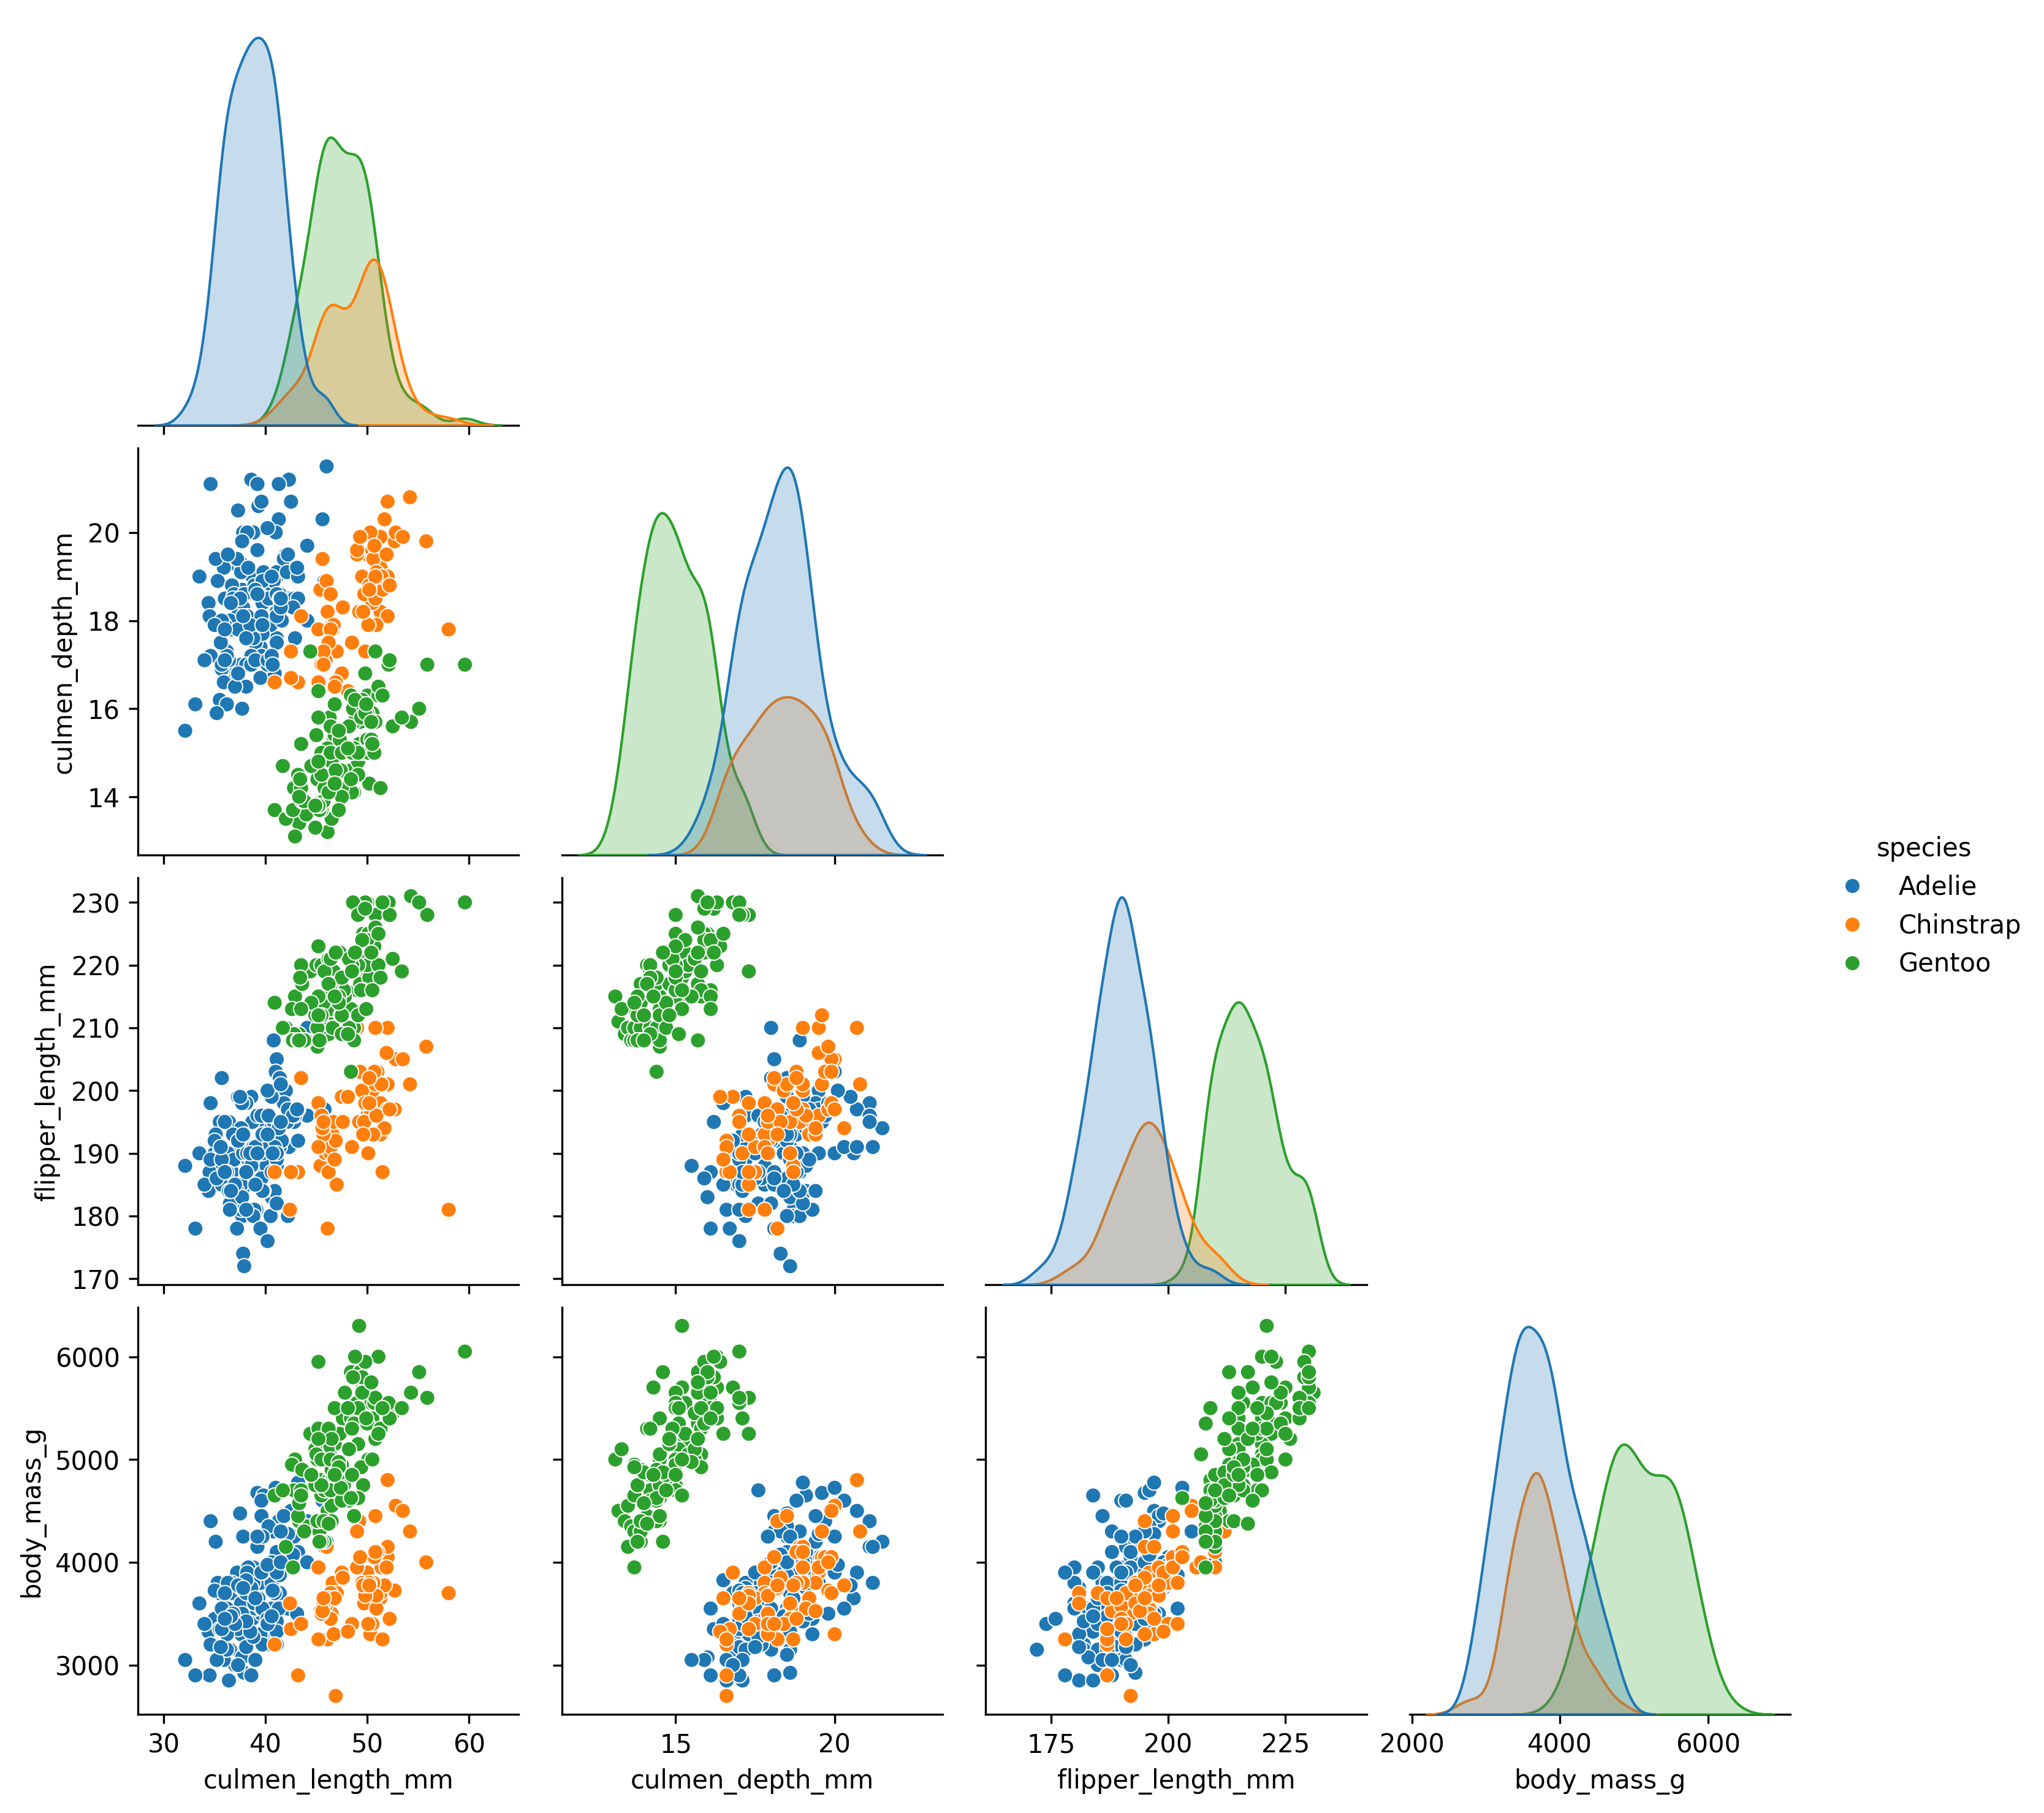

In [36]:
selected_columns = dataf_c[
    ['species','culmen_length_mm', 
     'culmen_depth_mm', 'flipper_length_mm', 
     'body_mass_g']]
sns.pairplot(selected_columns, 
             corner=True, 
             hue='species')
plt.show()

##### Pivot Table

In [37]:
pivot_table_result = pd.pivot_table(dataf_c,
                                    values=['culmen_length_mm', 'culmen_depth_mm', 
                                            'flipper_length_mm', 'body_mass_g'],
                                    index=['species'],
                                    aggfunc='mean')

print(pivot_table_result.round(1))

           body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm
species                                                                     
Adelie          3706.2             18.3              38.8              190.1
Chinstrap       3733.1             18.4              48.8              195.8
Gentoo          5092.4             15.0              47.6              217.2


The pivot table shows distinct characteristics across the Adelie, Chinstrap, and Gentoo species in terms of bill depth, bill length, body mass, and flipper length.

- **Gentoo**: Lead in all categories, having the deepest bills, longest bills, highest body mass, and longest flippers.

- **Chinstrap**: Generally heavier than Adelie but similar in other aspects.

- **Adelie**: Smallest in all metrics, very closely related to Chinstrap except for a slightly lower body mass.

In summary, Gentoo penguins are generally larger, while Adelie and Chinstrap are more similar to each other but differ slightly in body mass. These traits could serve as distinguishing features in ecological studies or machine learning models.

#### Gender-wise

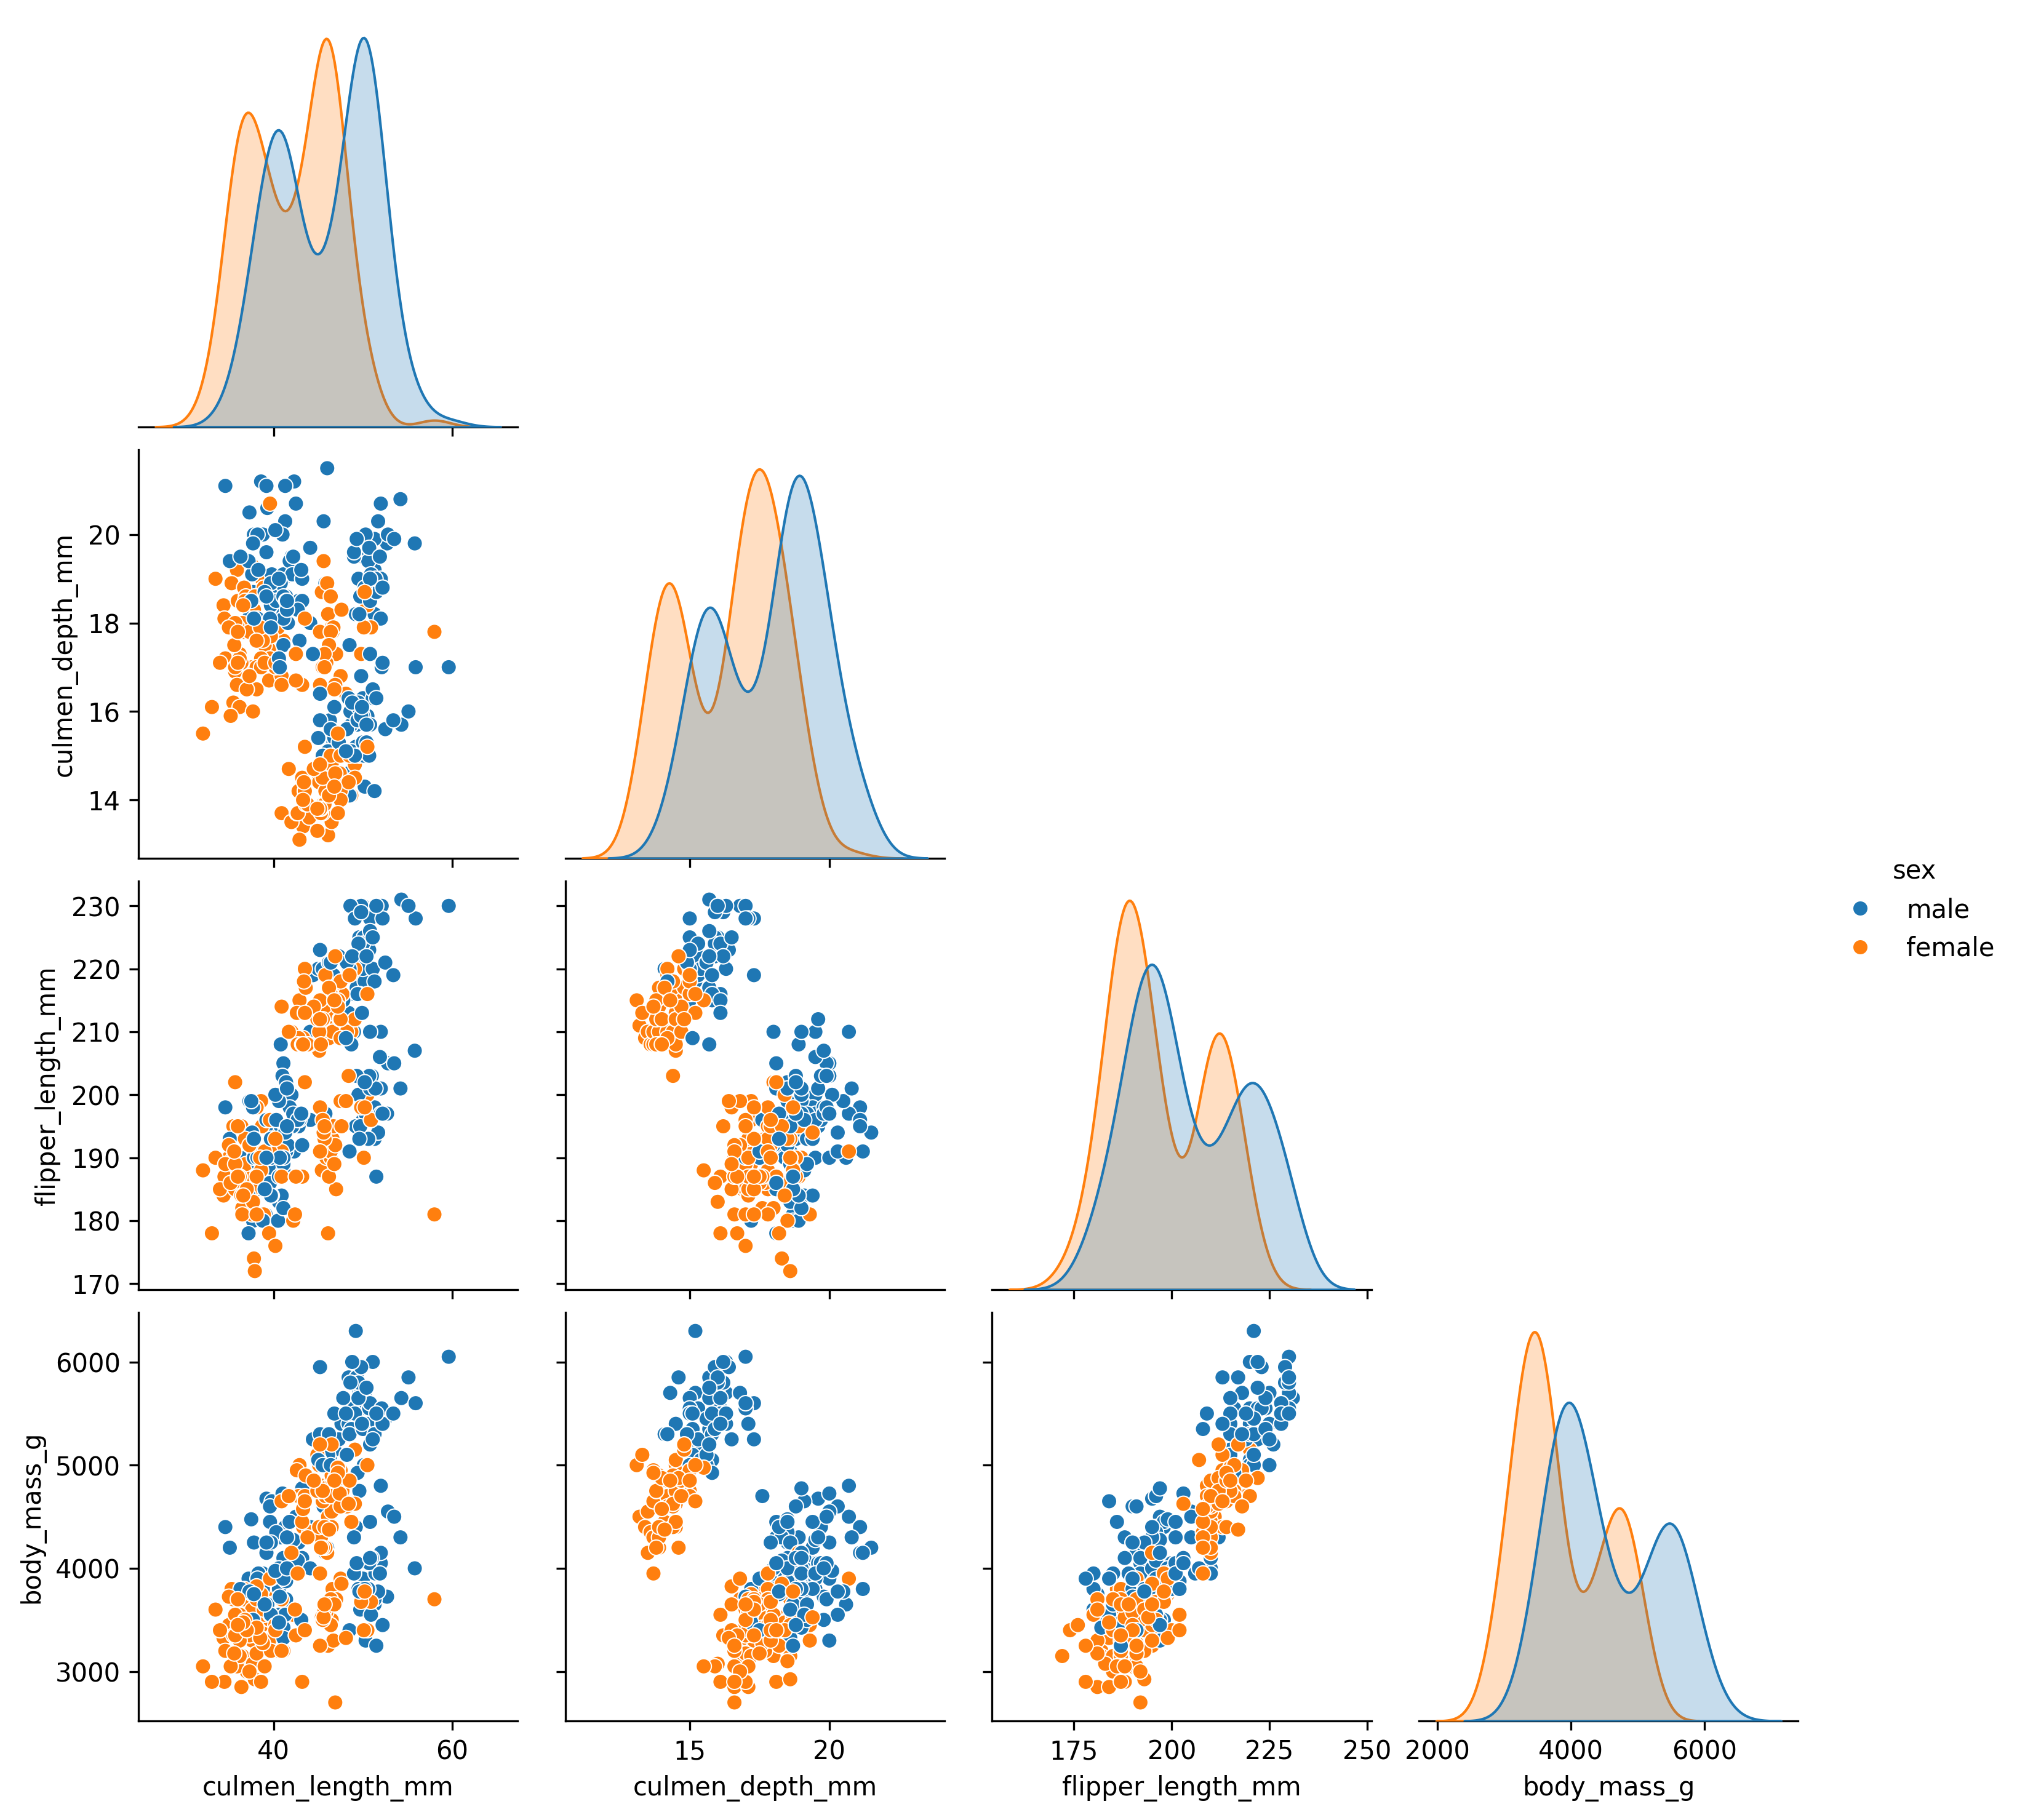

In [38]:
selected_columns2 = dataf_c[
    ['sex','culmen_length_mm', 
     'culmen_depth_mm', 'flipper_length_mm', 
     'body_mass_g']]
sns.pairplot(selected_columns2, 
             corner=True, 
             hue='sex')
plt.show()

#### Pivot Table

In [39]:
pivot_table_result = pd.pivot_table(dataf_c,
                                    values=['culmen_length_mm', 'culmen_depth_mm', 
                                            'flipper_length_mm', 'body_mass_g'],
                                    index=['sex'],
                                    aggfunc='mean')

print(pivot_table_result.round(1))

        body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm
sex                                                                      
female       3862.3             16.4              42.1              197.4
male         4545.7             17.9              45.9              204.5


The table shows noticeable differences between female and male penguins in terms of bill depth, bill length, body mass, and flipper length:

**Male** Penguins: Generally larger in all metrics, including deeper and longer bills, higher body mass, and longer flippers.

**Female** Penguins: Have smaller dimensions across the board, with shallower and shorter bills, lower body mass, and shorter flippers.

These observations indicate gender dimorphism in the penguin populations studied. The males are noticeably larger, suggesting that these metrics can be important features to distinguish between genders in biological or machine learning studies.

### Correlation Heatmaps

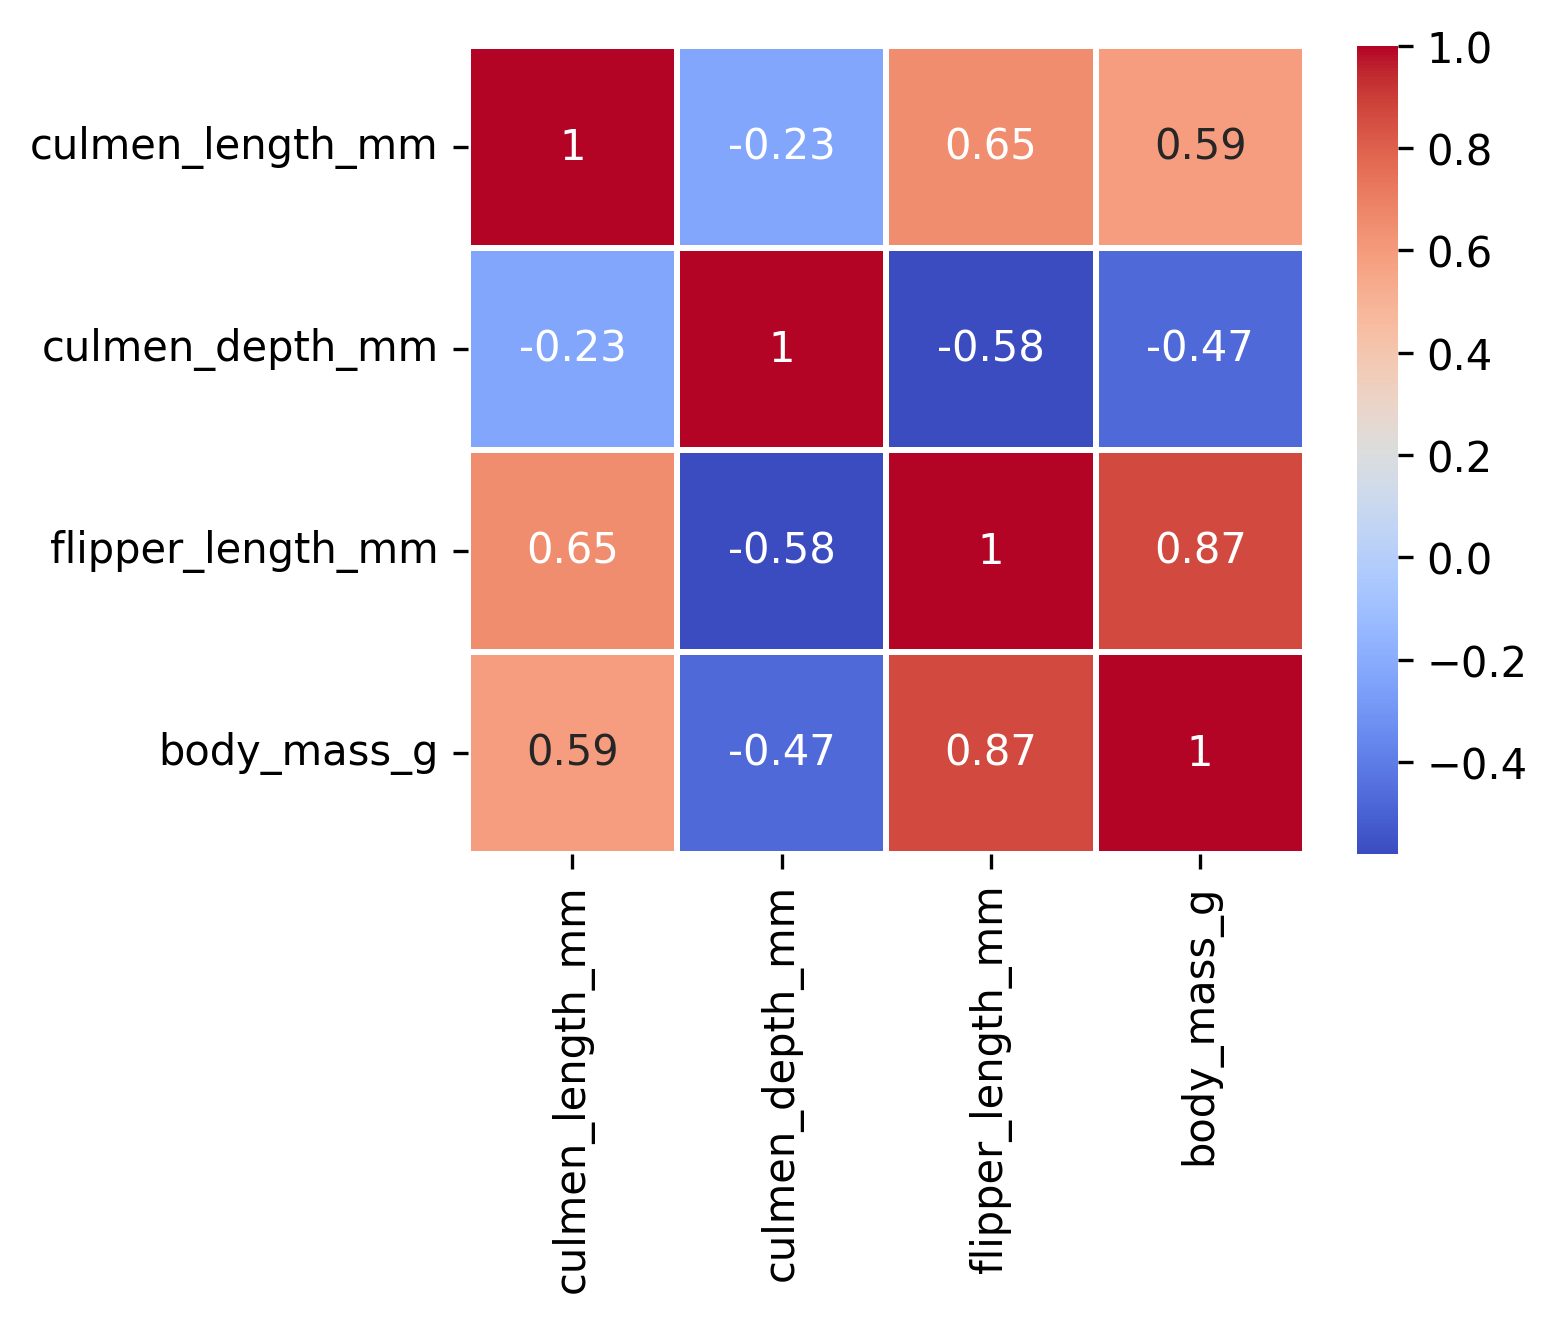

In [40]:
selected_columns3 = dataf_c[["culmen_length_mm", "culmen_depth_mm", 
                            "flipper_length_mm", "body_mass_g"]]
correlation_matrix = selected_columns3.corr().round(2)

sns.heatmap(correlation_matrix, annot=True,
            cmap="coolwarm", linewidth=1)
plt.show()

The correlation matrix provides a quantified relationship between the continuous variables in the dataset, ranging from -1 to 1. Positive values indicate a positive correlation, whereas negative values suggest an inverse correlation. A value closer to 1 or -1 signifies a stronger correlation.

- **Culmen Length & Flipper Length** (`r=0.65`): There is a moderately strong positive correlation between bill length and flipper length, suggesting that penguins with longer bills tend to have longer flippers.

- **Culmen Length & Body Mass** (`r=0.59`): A similar moderately strong positive correlation is observed between bill length and body mass, indicating that larger penguins generally have longer bills.

- **Flipper Length & Body Mass** (`r=0.87`): A strong positive correlation is present, indicating that flipper length is a good predictor of body mass or vice versa.

- **Culmen Depth & Body Mass** (`r=-0.47`): There's a moderate negative correlation between bill depth and body mass, which suggests that penguins with deeper bills are likely to have lower body mass, although not as strongly correlated as flipper length and body mass.

- **Culmen Length & Culmen Depth** (`r=-0.23`): There is a weak negative correlation, which implies that they are somewhat related but not significantly.

- **Culmen Depth & Flipper Length** (`r=0.49`): A moderate negative correlation exists, suggesting that deeper bills are somewhat associated with shorter flippers, but other factors could be at play.

In summary, flipper length shows the strongest correlations with other variables, particularly with body mass, making it a valuable metric for predicting a penguin's physical characteristics. On the other hand, bill length and bill depth show moderate to weak correlations with other features, suggesting that they capture different aspects of penguin morphology.

### Cramer's V (Association Analysis)

The Cramer's V table provides us with a measure of association between the different categorical variables in the dataset.

- The value ranges from 0 to 1
- 0 indicates no association
- 1 indicates a perfect association.

In [41]:
cat_cols = ['species', 'sex']
cramers_df = pd.DataFrame(index=cat_cols, columns=cat_cols)

def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = len(x)
    return np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_df.loc[col1, col2] = cramers_v(dataf_c[col1], dataf_c[col2]).round(2)

In [42]:
cramers_df

,species,sex
species,1.0,0.01
sex,0.01,0.99


The `V=0.01` value between species and gender suggests next to no association between the 2 categorical variables.